# Hawaii 2016 VEST File Validation

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import os

## VEST File

Note:
The shapefile [link provided by VEST](http://geoportal.hawaii.gov/datasets/cchnl::voter-precincts) leads to a page updated May 13, 2021 indicating that the shapefile is continuously updated. The file on this page has unique identifiers/precincts that do not match up with VEST's file (note that VEST's file was updated in June of 2019). 

The RDH found this link also from the Department of Elections [updated in 2019 and 2020](https://geoportal.hawaii.gov/datasets/historical-voting-precincts-2016/explore?location=20.552605%2C-157.490700%2C8.00) where the precincts do match up and therefore proceeded with this latter link.

In [2]:
#Read in vest file (geodataframevest --> gdfv)
gdfv = gpd.read_file('./raw-from-source/hi_2016/hi_2016.shp')
gdfv.head()

,precinct,G16PREDCli,G16PRERTru,G16PREGSte,G16PRELJoh,G16PRECCas,G16USSDSch,G16USSRCar,G16USSAGiu,G16USSLKok,G16USSCAll,geometry
0,07-03,1575,566,118,101,24,1763,448,4,39,52,"POLYGON ((835412.899 2242169.193, 835415.907 2..."
1,01-05,741,248,42,36,14,823,174,5,17,20,"POLYGON ((884382.104 2197539.220, 885788.712 2..."
2,01-01,1063,347,84,65,20,1228,266,4,31,31,"POLYGON ((861064.763 2213516.507, 861054.008 2..."
3,01-02,356,137,32,21,6,418,100,3,11,10,"POLYGON ((884360.697 2215164.448, 884347.850 2..."
4,01-06,599,215,32,41,8,682,137,4,18,20,"POLYGON ((884119.184 2193479.737, 884017.116 2..."


In [3]:
gdfv.precinct.nunique()

261

## State Precinct Shapefile

In [4]:
#Read in shapefile from state
shp = gpd.read_file('./raw-from-source/Historical_Voting_Precincts_-_2016/Historical_Voting_Precincts_-_2016.shp')
shp.head()

,objectid,id,st_areasha,st_perimet,geometry
0,1,07-03,3.433164e+08,100748.265938,"POLYGON ((-155.78976 20.24790, -155.78974 20.2..."
1,2,01-05,1.434850e+08,75515.358882,"POLYGON ((-155.11900 19.88275, -155.11885 19.8..."
2,3,01-01,3.771899e+08,141411.355576,"POLYGON ((-155.69902 20.18606, -155.69863 20.1..."
3,4,01-02,2.207124e+08,69022.645749,"POLYGON ((-155.40967 20.07713, -155.40941 20.0..."
4,5,01-06,1.087545e+08,72825.896614,"POLYGON ((-155.33447 19.79968, -155.33545 19.7..."


In [5]:
shp['precinct'] = shp['id']

In [6]:
len(set(shp['precinct'])-set(gdfv.precinct))

0

In [7]:
len(set(gdfv.precinct)-set(shp['precinct']))

1

In [8]:
set(gdfv.precinct)-set(shp['precinct'])

{'Unassigned'}

In [9]:
gdfv[gdfv.precinct.isin(set(gdfv.precinct)-set(shp['precinct']))]

,precinct,G16PREDCli,G16PRERTru,G16PREGSte,G16PRELJoh,G16PRECCas,G16USSDSch,G16USSRCar,G16USSAGiu,G16USSLKok,G16USSCAll,geometry
247,Unassigned,0,0,0,0,0,0,0,0,0,0,"POLYGON ((945613.098 2163826.061, 945627.451 2..."
256,Unassigned,0,0,0,0,0,0,0,0,0,0,"MULTIPOLYGON (((460104.457 2415952.808, 459640..."
257,Unassigned,0,0,0,0,0,0,0,0,0,0,"MULTIPOLYGON (((705962.217 2352349.201, 706575..."
258,Unassigned,0,0,0,0,0,0,0,0,0,0,"MULTIPOLYGON (((641734.647 2350078.043, 641232..."


<AxesSubplot:>

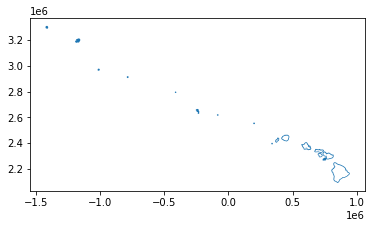

In [10]:
gdfv[gdfv.precinct.isin(set(gdfv.precinct)-set(shp['precinct']))].plot()

## State Precinct Election Resuls

In [11]:
#Load in election results from the state
df = pd.read_csv('./raw-from-source/hi_2016_election_results.txt', delimiter = ',')
df.head()

,Precinct_Name,Split_Name,precinct_splitId,Reg_voters,Ballots,Reporting,Contest_id,Contest_title,Contest_party,Choice_id,Candidate_name,Choice_party,Candidate_Type,Absentee_votes,Early_votes,Election_Votes
0,01-01,NaN,1,2930,1626,1,1,President and Vice President,NaN,1,"(G) STEIN, Jill / BARAKA, Ajamu",NaN,C,32,3,49
1,01-01,NaN,1,2930,1626,1,1,President and Vice President,NaN,2,"(L) JOHNSON, Gary / WELD, Bill",NaN,C,25,5,35
2,01-01,NaN,1,2930,1626,1,1,President and Vice President,NaN,3,"(R) TRUMP, Donald J. / PENCE, Michael R.",NaN,C,130,38,179
3,01-01,NaN,1,2930,1626,1,1,President and Vice President,NaN,4,"(D) CLINTON, Hillary / KAINE, Tim",NaN,C,498,95,470
4,01-01,NaN,1,2930,1626,1,1,President and Vice President,NaN,5,"(C) CASTLE, Darrell L. / BRADLEY, Scott N.",NaN,C,13,2,5


In [12]:
df[df['Contest_title'].str.startswith('State')]

,Precinct_Name,Split_Name,precinct_splitId,Reg_voters,Ballots,Reporting,Contest_id,Contest_title,Contest_party,Choice_id,Candidate_name,Choice_party,Candidate_Type,Absentee_votes,Early_votes,Election_Votes
12,01-01,NaN,1,2930,1626,1,15,"State Representative, Dist 1",NaN,47,"(D) NAKASHIMA, Mark M.",NaN,C,578,111,539
13,01-01,NaN,1,2930,1626,1,15,"State Representative, Dist 1",NaN,48,"(R) YOUNG, Byron",NaN,C,116,25,162
36,01-02,NaN,2,934,561,1,15,"State Representative, Dist 1",NaN,47,"(D) NAKASHIMA, Mark M.",NaN,C,193,31,182
37,01-02,NaN,2,934,561,1,15,"State Representative, Dist 1",NaN,48,"(R) YOUNG, Byron",NaN,C,59,3,59
60,01-03,NaN,3,1046,620,1,15,"State Representative, Dist 1",NaN,47,"(D) NAKASHIMA, Mark M.",NaN,C,235,48,195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14958,51-04,NaN,245,4279,2827,1,14,"State Senator, Dist 25",NaN,46,"(R) NAGAMINE, Robert K.",NaN,C,338,52,512
15023,51-05,NaN,246,3009,1511,1,14,"State Senator, Dist 25",NaN,45,"(D) THIELEN, Laura H.",NaN,C,305,27,661
15024,51-05,NaN,246,3009,1511,1,14,"State Senator, Dist 25",NaN,46,"(R) NAGAMINE, Robert K.",NaN,C,172,20,265
15089,51-06,NaN,247,3048,1580,1,14,"State Senator, Dist 25",NaN,45,"(D) THIELEN, Laura H.",NaN,C,417,48,696


In [13]:
df['Contest_title'][~df['Contest_title'].str.startswith('State')].value_counts()

President and Vice President                                                        1240
U.S. Senator                                                                        1235
U.S. Representative, Dist I Vacancy                                                 1130
CON AMEND: Disposition of Excess Revenues                                            494
Hawaii Resident Trustee                                                              494
CON AMEND: Jury Trials in Civil Cases                                                494
At-Large Trustee                                                                     494
U.S. Representative, Dist I                                                          452
HONOLULU: City Infrastructure Long Term Plans                                        306
HONOLULU: Signing Delegation by Mayor                                                306
HONOLULU: Ethics Commission Staff Salaries                                           306
HONOLULU: Nonpartisan

In [14]:
df = df[(df['Contest_title'] == 'U.S. Senator')|(df['Contest_title'] == 'President and Vice President')]

In [15]:
df['Candidate_name'].str.slice(start=1,stop=2).value_counts()

L    495
D    495
R    495
C    495
G    248
A    247
Name: Candidate_name, dtype: int64

In [16]:
#modify naming convention to match vest and prepare to pivot table
df.loc[df['Contest_id']==1, 'race'] = 'PRE'
df.loc[df['Contest_id']==2, 'race'] = 'USS'

df['party'] = df['Candidate_name'].str.slice(start=1,stop=2)

df['short_name'] = df['Candidate_name'].str.slice(start=4, stop=5) + df['Candidate_name'].str.slice(start=5, stop=7).str.lower()
df['column_header'] = 'G16' + df['race']+df['party']+df['short_name']

df['vote_total'] = df['Absentee_votes'] + df['Early_votes'] + df['Election_Votes']

In [17]:
df['column_header'].value_counts()

G16PRECCas    248
G16PREDCli    248
G16PREGSte    248
G16PRERTru    248
G16PRELJoh    248
G16USSLKok    247
G16USSRCar    247
G16USSCAll    247
G16USSAGiu    247
G16USSDSch    247
Name: column_header, dtype: int64

In [18]:
set(df['column_header']) - set(gdfv.columns)
set(gdfv.columns)-set(df['column_header'])

{'geometry', 'precinct'}

### Pivot Election Results

In [19]:
df_pivot = df.pivot_table(index = ['Precinct_Name'],
                          columns = ['column_header'],
                          values = ['vote_total'],
                          aggfunc = 'sum')

df_pivot.reset_index(inplace = True)

df_pivot

Precinct_Name vote_total                                   \
column_header               G16PRECCas G16PREDCli G16PREGSte G16PRELJoh   
0                     01-01       20.0     1063.0       84.0       65.0   
1                     01-02        6.0      356.0       32.0       21.0   
2                     01-03        6.0      441.0       21.0       23.0   
3                     01-04        1.0      144.0        9.0       10.0   
4                     01-05       14.0      741.0       42.0       36.0   
..                      ...        ...        ...        ...        ...   
243                   51-03        6.0      659.0       32.0       51.0   
244                   51-04       26.0     1700.0       58.0      112.0   
245                   51-05       30.0      891.0       48.0       54.0   
246                   51-06       41.0      989.0       50.0       53.0   
247            Presidential        0.0        0.0        0.0        0.0   

                                                                      \
column_header G16PRERTru G16USSAGiu G16USSCAll G16USSDSch G16USSLKok   
0                  347.0        4.0       31.0     1228.0       31.0   
1                  137.0        3.0       10.0      418.0       11.0   
2                  119.0        3.0       13.0      478.0       14.0   
3                   48.0        1.0        2.0      158.0        5.0   
4                  248.0        5.0       20.0      823.0       17.0   
..                   ...        ...        ...        ...        ...   
243                291.0        0.0        9.0      710.0       17.0   
244                872.0        5.0       25.0     1977.0       34.0   
245                469.0        5.0       32.0     1087.0       30.0   
246                422.0       10.0       37.0     1181.0       14.0   
247                  0.0        NaN        NaN        NaN        NaN   

                          
column_header G16USSRCar  
0                  266.0  
1                  100.0  
2                   83.0  
3                   38.0  
4                  174.0  
..                   ...  
243                254.0  
244                667.0  
245                313.0  
246                276.0  
247                  NaN  

[248 rows x 11 columns]

In [20]:
df_pivot.columns

MultiIndex([('Precinct_Name',           ''),
            (   'vote_total', 'G16PRECCas'),
            (   'vote_total', 'G16PREDCli'),
            (   'vote_total', 'G16PREGSte'),
            (   'vote_total', 'G16PRELJoh'),
            (   'vote_total', 'G16PRERTru'),
            (   'vote_total', 'G16USSAGiu'),
            (   'vote_total', 'G16USSCAll'),
            (   'vote_total', 'G16USSDSch'),
            (   'vote_total', 'G16USSLKok'),
            (   'vote_total', 'G16USSRCar')],
           names=[None, 'column_header'])

In [21]:
df_pivot.columns = ['Precinct_Name', 'G16PRECCas', 'G16PREDCli', 'G16PREGSte', 'G16PRELJoh', 'G16PRERTru', 'G16USSAGiu', 'G16USSCAll', 
                    'G16USSDSch', 'G16USSLKok', 'G16USSRCar']

df_pivot['precinct'] = df_pivot['Precinct_Name'].astype(str)
df_pivot = df_pivot[df_pivot['precinct'] != 'Presidential']
df_pivot

,Precinct_Name,G16PRECCas,G16PREDCli,G16PREGSte,G16PRELJoh,G16PRERTru,G16USSAGiu,G16USSCAll,G16USSDSch,G16USSLKok,G16USSRCar,precinct
0,01-01,20.0,1063.0,84.0,65.0,347.0,4.0,31.0,1228.0,31.0,266.0,01-01
1,01-02,6.0,356.0,32.0,21.0,137.0,3.0,10.0,418.0,11.0,100.0,01-02
2,01-03,6.0,441.0,21.0,23.0,119.0,3.0,13.0,478.0,14.0,83.0,01-03
3,01-04,1.0,144.0,9.0,10.0,48.0,1.0,2.0,158.0,5.0,38.0,01-04
4,01-05,14.0,741.0,42.0,36.0,248.0,5.0,20.0,823.0,17.0,174.0,01-05
...,...,...,...,...,...,...,...,...,...,...,...,...
242,51-02,12.0,1133.0,47.0,85.0,675.0,4.0,32.0,1313.0,20.0,544.0,51-02
243,51-03,6.0,659.0,32.0,51.0,291.0,0.0,9.0,710.0,17.0,254.0,51-03
244,51-04,26.0,1700.0,58.0,112.0,872.0,5.0,25.0,1977.0,34.0,667.0,51-04
245,51-05,30.0,891.0,48.0,54.0,469.0,5.0,32.0,1087.0,30.0,313.0,51-05


In [22]:
print('# ids in vest not in election results: ', len(set(gdfv.precinct)-set(df_pivot['Precinct_Name'])))
print('# ids in election results not vest file: ', len(set(df_pivot['Precinct_Name']) - set(gdfv.precinct)))

# ids in vest not in election results:  14
# ids in election results not vest file:  0


In [23]:
#look more closely at those in VEST file not in election results
gdfv[gdfv['precinct'].isin(set(gdfv.precinct)-set(df_pivot['Precinct_Name']))]

,precinct,G16PREDCli,G16PRERTru,G16PREGSte,G16PRELJoh,G16PRECCas,G16USSDSch,G16USSRCar,G16USSAGiu,G16USSLKok,G16USSCAll,geometry
247,Unassigned,0,0,0,0,0,0,0,0,0,0,"POLYGON ((945613.098 2163826.061, 945627.451 2..."
248,07-06,0,0,0,0,0,0,0,0,0,0,"POLYGON ((834037.786 2181626.455, 836701.480 2..."
249,01-11,0,0,0,0,0,0,0,0,0,0,"POLYGON ((855154.099 2197326.868, 855147.913 2..."
250,01-10,0,0,0,0,0,0,0,0,0,0,"POLYGON ((877842.533 2199633.012, 877842.432 2..."
251,04-05,0,0,0,0,0,0,0,0,0,0,"POLYGON ((891121.184 2141062.620, 891125.005 2..."
252,05-09,0,0,0,0,0,0,0,0,0,0,"POLYGON ((872075.139 2169252.859, 872075.208 2..."
253,05-10,0,0,0,0,0,0,0,0,0,0,"POLYGON ((883994.055 2168088.652, 884030.026 2..."
254,05-11,0,0,0,0,0,0,0,0,0,0,"POLYGON ((854208.122 2164518.165, 854130.177 2..."
255,07-07,0,0,0,0,0,0,0,0,0,0,"POLYGON ((852778.578 2194288.194, 852773.152 2..."
256,Unassigned,0,0,0,0,0,0,0,0,0,0,"MULTIPOLYGON (((460104.457 2415952.808, 459640..."


Above, see that the lack of overlap in precinct ids between election results and VEST file all occur in zero-vote precincts so not a concern

## Compare election result totals

In [24]:
column_list = ['G16PREDCli', 'G16PRERTru', 'G16PREGSte', 'G16PRELJoh',
       'G16PRECCas', 'G16USSDSch', 'G16USSRCar', 'G16USSAGiu', 'G16USSLKok',
       'G16USSCAll']

In [25]:
#Total votes comparison
sum_var_1 = 0
sum_var_2 = 0
for i in column_list:
    sum_var_1 += np.sum(gdfv[i])
    sum_var_2 += np.sum(df_pivot[i])
print('vest sum: ', sum_var_1)
print('state sum: ', sum_var_2)

vest sum:  845499
state sum:  845499.0


In [26]:
#Race totals comparison
for race in column_list:
    diff_val = sum(gdfv[race])-sum(df_pivot[race])
    if diff_val != 0:
        print(race+": "+str(diff_val))
    else:
        print(race+": EQUAL - " + str(sum(gdfv[race])))

G16PREDCli: EQUAL - 266891
G16PRERTru: EQUAL - 128847
G16PREGSte: EQUAL - 12737
G16PRELJoh: EQUAL - 15954
G16PRECCas: EQUAL - 4508
G16USSDSch: EQUAL - 306604
G16USSRCar: EQUAL - 92653
G16USSAGiu: EQUAL - 1393
G16USSLKok: EQUAL - 6809
G16USSCAll: EQUAL - 9103


In [27]:
df_pivot = df_pivot.fillna(0)
#merge to check results
gdfv_df_merge = pd.merge(df_pivot, gdfv, on = 'precinct', how = 'inner', suffixes = ('_x', '_y'))

In [28]:
#Precinct comparison
def validater_row (df, column_List):
    matching_rows = 0
    different_rows = 0
    diff_list=[]
    diff_values = []
    max_diff = 0
    
    for j in range(0,len(df.index)):
        same = True
        for i in column_List:
            left_Data = i + "_x"
            right_Data = i + "_y"
            diff = abs(df.iloc[j][left_Data]-df.iloc[j][right_Data])
            if(diff != 0):
                diff_values.append(abs(diff))
                same = False
                if(np.isnan(diff)):
                    print("NaN value at diff is: ", df.iloc[j]['precinct'])
                if (diff>max_diff):
                    max_diff = diff
                    #add line to check percent from total vote difference is
                    perc_diff_from_vest = (diff/df.iloc[j][right_Data])*100
                    print("New max diff is: ", str(max_diff))
                    print('% difference from VEST total is: ', str(perc_diff_from_vest))
                    print(df.iloc[j]['PRECINCT'])
        if(same != True):
            different_rows +=1
            diff_list.append(df.iloc[j]['precinct'])
        else:
            matching_rows +=1
    print("There are ", len(df.index)," total rows")
    print(different_rows," of these rows have election result differences")
    print(matching_rows," of these rows are the same")
    print("")
    print("The max difference between any one shared column in a row is: ", max_diff)
    if(len(diff_values)!=0):
        print("The average difference is: ", str(sum(diff_values)/len(diff_values)))
        #add line for % of total vote that difference is
    count_big_diff = len([i for i in diff_values if i > 10])
    print("There are ", str(count_big_diff), "precinct results with a difference greater than 5")
    diff_list.sort()

In [29]:
validater_row (gdfv_df_merge, column_list)

There are  247  total rows
0  of these rows have election result differences
247  of these rows are the same

The max difference between any one shared column in a row is:  0
There are  0 precinct results with a difference greater than 5


In [30]:
gdfv.shape

(264, 12)

No need to check at county level because all votes match up at precinct level! Inner join done here Because unmatched precincts in VEST's file are just zero votes.

## shp and df join

In [31]:
join_attempt_one = pd.merge(df_pivot,shp,how="outer",on="precinct",indicator=True)
print(join_attempt_one["_merge"].value_counts())

both          247
right_only     13
left_only       0
Name: _merge, dtype: int64


In [32]:
list(join_attempt_one['precinct'][join_attempt_one['_merge'] == 'right_only'])

['07-06',
 '01-11',
 '01-10',
 '04-05',
 '05-09',
 '05-10',
 '05-11',
 '07-07',
 '39-05',
 '31-06',
 '35-07',
 '37-05',
 '45-06']

In [33]:
join_attempt_one.columns

Index(['Precinct_Name', 'G16PRECCas', 'G16PREDCli', 'G16PREGSte', 'G16PRELJoh',
       'G16PRERTru', 'G16USSAGiu', 'G16USSCAll', 'G16USSDSch', 'G16USSLKok',
       'G16USSRCar', 'precinct', 'objectid', 'id', 'st_areasha', 'st_perimet',
       'geometry', '_merge'],
      dtype='object')

In [34]:
join = join_attempt_one

## Validation

In [35]:
shp_final_merge = pd.merge(join, gdfv, on = 'precinct', how = 'outer', suffixes = ['_x', '_y'])
#join['geometry'].geom_almost_equals(gdfv['geometry'], decimal = 0)

In [36]:
both = shp_final_merge[shp_final_merge["_merge"]=="both"]
source_geoms = gpd.GeoDataFrame(both,geometry="geometry_x",crs=gdfv.crs)
vest_geoms = gpd.GeoDataFrame(both,geometry="geometry_y",crs=gdfv.crs)
source_geoms = source_geoms.to_crs(gdfv.crs)
vest_geoms = vest_geoms.to_crs(gdfv.crs)
source_geoms["geometry_x"]=source_geoms.buffer(0)
vest_geoms["geometry_y"]=vest_geoms.buffer(0)
vals = source_geoms.geom_almost_equals(vest_geoms,decimal=0)
print(vals.value_counts())

False    247
dtype: int64


In [37]:
source_geoms.head()

,Precinct_Name,G16PRECCas_x,G16PREDCli_x,G16PREGSte_x,G16PRELJoh_x,G16PRERTru_x,G16USSAGiu_x,G16USSCAll_x,G16USSDSch_x,G16USSLKok_x,...,G16PRERTru_y,G16PREGSte_y,G16PRELJoh_y,G16PRECCas_y,G16USSDSch_y,G16USSRCar_y,G16USSAGiu_y,G16USSLKok_y,G16USSCAll_y,geometry_y
0,01-01,20.0,1063.0,84.0,65.0,347.0,4.0,31.0,1228.0,31.0,...,347,84,65,20,1228,266,4,31,31,"POLYGON ((861064.763 2213516.507, 861054.008 2..."
1,01-02,6.0,356.0,32.0,21.0,137.0,3.0,10.0,418.0,11.0,...,137,32,21,6,418,100,3,11,10,"POLYGON ((884360.697 2215164.448, 884347.850 2..."
2,01-03,6.0,441.0,21.0,23.0,119.0,3.0,13.0,478.0,14.0,...,119,21,23,6,478,83,3,14,13,"POLYGON ((885490.000 2219300.205, 885497.988 2..."
3,01-04,1.0,144.0,9.0,10.0,48.0,1.0,2.0,158.0,5.0,...,48,9,10,1,158,38,1,5,2,"POLYGON ((884154.636 2198691.259, 883989.269 2..."
4,01-05,14.0,741.0,42.0,36.0,248.0,5.0,20.0,823.0,17.0,...,248,42,36,14,823,174,5,17,20,"POLYGON ((884382.104 2197539.220, 885788.712 2..."


1) For 07-01 difference in area is 0.6046763239586297


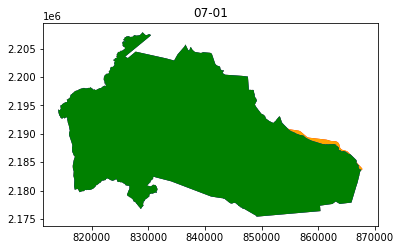

In [38]:
count = 0
area_list = []
big_diff = pd.DataFrame(columns=["area"])
for i in range(0,len(source_geoms)):
    diff = source_geoms.iloc[[i]].symmetric_difference(vest_geoms.iloc[[i]])
    intersection = source_geoms.iloc[[i]].intersection(vest_geoms.iloc[[i]])
    area = float(diff.area/10e6)
    area_list.append(area)
    #print("Area is " + str(area))

    if (area > .5):
        count += 1
        name = source_geoms.at[i,"Precinct_Name"]
        big_diff.loc[name]=area
        print(str(count)+") For " + name + " difference in area is " + str(area))
        if (intersection.iloc[0].is_empty):
            base = diff.plot(color="red")
            source_geoms.iloc[[i]].plot(color="orange",ax=base)
            vest_geoms.iloc[[i]].plot(color="blue",ax=base)
            base.set_title(name)
        else:
            base = diff.plot(color="red")
            source_geoms.iloc[[i]].plot(color="orange",ax=base)
            vest_geoms.iloc[[i]].plot(color="blue",ax=base)
            intersection.plot(color="green",ax=base)
            base.set_title(name)

<AxesSubplot:>

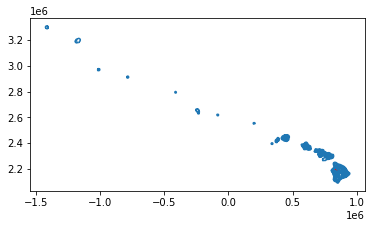

In [39]:
ax = gdfv.boundary.plot()
gdfv[gdfv["precinct"]=="07-01"].plot(ax = ax,color="red")

(2175400.5144999996, 2207906.2729)

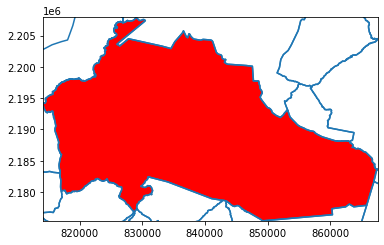

In [40]:
ax = gdfv.boundary.plot()
gdfv[gdfv["precinct"]=="07-01"].plot(ax = ax,color="red")
minx, miny, maxx, maxy = gdfv[gdfv["precinct"]=="07-01"].total_bounds
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

In [41]:
df = pd.DataFrame(area_list)
print(df.shape)

print(str(len(df[df[0]==0]))+" precincts w/ a difference of 0 km^2")
print(str(len(df[(df[0]<.1) & (df[0]>0)]))+ " precincts w/ a difference between 0 and 0.1 km^2")
print(str(len(df[(df[0]<.5) & (df[0]>=.1)]))+ " precincts w/ a difference between 0.1 and 0.5 km^2")
print(str(len(df[(df[0]<1) & (df[0]>=.5)]))+ " precincts w/ a difference between 0.5 and 1 km^2")
print(str(len(df[(df[0]<2) & (df[0]>=1)]))+ " precincts w/ a difference between 1 and 2 km^2")
print(str(len(df[(df[0]<5) & (df[0]>=2)]))+ " precincts w/ a difference between 2 and 5 km^2")
print(str(len(df[(df[0]>=5)]))+ " precincts w/ a difference greater than 5 km^2")

(247, 1)
0 precincts w/ a difference of 0 km^2
246 precincts w/ a difference between 0 and 0.1 km^2
0 precincts w/ a difference between 0.1 and 0.5 km^2
1 precincts w/ a difference between 0.5 and 1 km^2
0 precincts w/ a difference between 1 and 2 km^2
0 precincts w/ a difference between 2 and 5 km^2
0 precincts w/ a difference greater than 5 km^2


In [42]:
area_list

[0.00763714802401236,
 0.004761041754320207,
 0.05923529307831079,
 0.004095116108837347,
 0.004674315143556494,
 0.005303750044914167,
 0.005349802337799347,
 0.00901041677745501,
 0.005781397066427371,
 0.004208117795502157,
 0.004343563511942748,
 0.0036684413351104027,
 0.005307686220303772,
 0.002015100466493969,
 0.028534805683917926,
 0.009741795386206193,
 0.0013932735307278237,
 0.03981860572580602,
 0.020523771793838543,
 0.02376508816710665,
 0.02112119520728453,
 0.006191134220430831,
 0.014215482463880448,
 0.02043176806232467,
 0.014633963203601278,
 0.015794369738169483,
 0.008446454949608198,
 0.006585225837943742,
 0.00827491767664958,
 0.004154720896624884,
 0.006264600794469246,
 0.008590475470758313,
 0.0024807764136934836,
 0.0011862442229146361,
 0.005939126269139855,
 0.009423789208491306,
 0.0054570459107674465,
 0.002957734255287346,
 0.6046763239586297,
 0.011222927226434287,
 0.005030640615458596,
 0.009777184156536702,
 0.005854924601915049,
 0.0043398291897

In [43]:
print(str(df[(df[0]<1) & (df[0]>=.5)]))

           0
38  0.604676


In [44]:
df

,0
0,0.007637
1,0.004761
2,0.059235
3,0.004095
4,0.004674
...,...
242,0.014410
243,0.020194
244,0.030926
245,0.028660


#### To get a better sense for this difference, I looked at the basemap under Precinct 07-07 at the sourcefile link: https://geoportal.hawaii.gov/datasets/historical-voting-precincts-2016/explore?location=19.775720%2C-155.579174%2C13.69